Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 10,5



In [4]:
def select_years (row):
    if row.Time in range(1950, 2020):
        return row

In [74]:
world_pop = pd.read_csv('Population/WPP2019_TotalPopulationBySex.csv')
"""
Total population by sex, annually from 1950 to 2100.
PopMale: Total male population (thousands)
PopFemale: Total female population (thousands)
PopTotal: Total population, both sexes (thousands)
PopDensity: Population per square kilometre (thousands)

https://population.un.org/wpp/Download/Standard/CSV/
"""
world_population = world_pop.loc[:, ['Location', 'Time', 'PopMale', 'PopFemale', 'PopTotal', 'PopDensity']]
world_population = world_population.dropna()
world_population

,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
0,Afghanistan,1950,4099.243,3652.874,7752.117,11.874
1,Afghanistan,1951,4134.756,3705.395,7840.151,12.009
2,Afghanistan,1952,4174.450,3761.546,7935.996,12.156
3,Afghanistan,1953,4218.336,3821.348,8039.684,12.315
4,Afghanistan,1954,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...
280927,Zimbabwe,2080,10576.533,11255.983,21836.893,56.448
280928,Zimbabwe,2085,10293.349,11050.875,21355.988,55.205
280929,Zimbabwe,2090,9920.336,10767.709,20689.956,53.483
280930,Zimbabwe,2095,9503.711,10412.184,19892.080,51.421


In [96]:
population_rus = world_population.\
    loc[world_population.Location == 'Russian Federation', ['Location', 'Time', 'PopMale', 'PopFemale', 'PopTotal', 'PopDensity']]

population_rus_filtered = population_rus.apply(select_years, axis=1)

"""
Не понимаю, почему, если вывести таблицу population_rus, то в столбцах Time, AgeGrpStart, AgeGrpSpan 
целые числа, а после применения apply в этих же столбцах число с плавающей точкой (появляется Х.0)?
"""

population_rus_filtered.head()


,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
205572,Russian Federation,1950.0,44575.785,58222.864,102798.649,6.277
205573,Russian Federation,1951.0,45398.672,58906.026,104304.698,6.369
205574,Russian Federation,1952.0,46295.163,59671.924,105967.087,6.471
205575,Russian Federation,1953.0,47236.274,60491.036,107727.310,6.578
205576,Russian Federation,1954.0,48198.106,61338.398,109536.504,6.688


1. Цель: проследить, как изменялось население в РФ по годам (1950-2019)
Используются числовые переменные и линейная диаграмма. 

Text(1991, 149000, 'max')

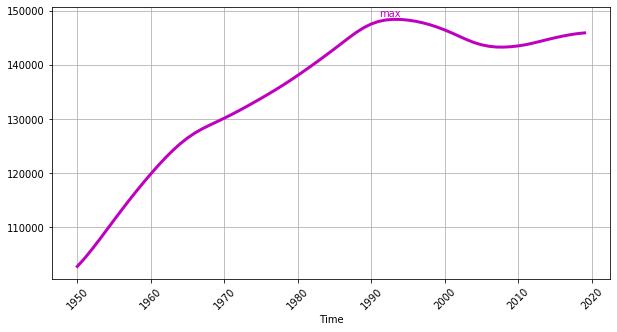

In [20]:
df = population_rus_filtered.groupby('Time').mean()
df.PopTotal.plot(color='m', linewidth=3, rot = 45)
plt.grid(True)
plt.text(1991, 149000, 'max', color='m')

Вывод: численность населения России постоянно росла до начала 90х годов, затем наблюдается убыль населения примерно до 2007 года. В последние 10 лет численность населения снова возрастает (к сожалению, в этой таблице нет ответа на вопрос, естественный ли это прирост или прирост за счет миграционных процессов). 

2. Цель: проследить, как изменялось население в России в разрезе пола по годам (1950-2019) Используются числовые переменные и линейная диаграмма. 

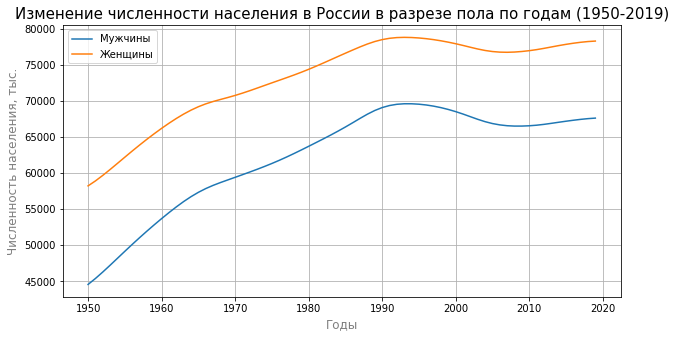

In [55]:
MF_rus = population_rus_filtered.groupby('Time').mean()[['PopMale', 'PopFemale']]
plt.plot(MF_rus)
plt.xlabel('Годы', fontsize = 12, color = 'grey')
plt.ylabel('Численность населения, тыс.', fontsize = 12, color = 'grey')
plt.title('Изменение численности населения в России в разрезе пола по годам (1950-2019)', fontsize = 15)
plt.grid(True)
plt.legend(['Mужчины', 'Женщины'])

Вывод: в России численность женского населения стабильно превышает численность мужского населения (привет девушкам из Иваново :-) ) на протяжении всего периода 1950-2019гг.

3. Цель: сравнить численность населения в России в разрезе пола в 1950 году и в 2019. Столбчатая диаграмма.

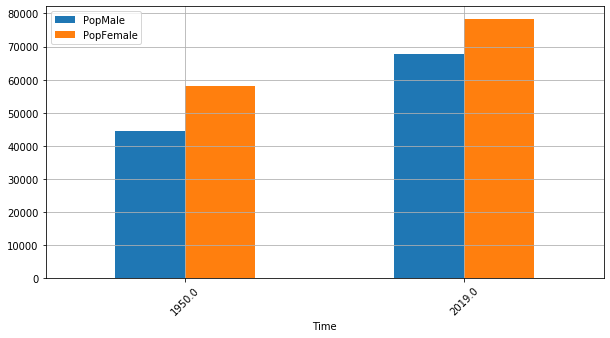

In [53]:
population_rus = population_rus_filtered.groupby('Time').mean()
pop_rus = population_rus.loc[population_rus.index.isin([1950, 2019]), ['PopMale', 'PopFemale']]
pop_rus.plot.bar(rot = 45, grid = True)


Вывод: 1) численность как мужчин, так и женщин возросла, 2) количество женщин первышает количество мужчин в обоих случаях, 3) разрыв численности между мужчинами и женщинами сократился 

4. Цель: показать распределение численности населения некоторых стран по годам

In [107]:
world_population_filtered = world_population.apply(select_years, axis=1)

wp = world_population_filtered.loc[(world_population_filtered.Location.isin(['Russian Federation', 'India', 'China', 'Brazil', 'United States of America']))]
wp = wp.dropna()
wp

,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
30726,Brazil,1950.0,26775.992,27198.736,53974.728,6.458
30727,Brazil,1951.0,27594.666,28011.747,55606.413,6.653
30728,Brazil,1952.0,28437.736,28845.922,57283.658,6.854
30729,Brazil,1953.0,29301.180,29698.096,58999.276,7.059
30730,Brazil,1954.0,30182.716,30566.774,60749.490,7.268
...,...,...,...,...,...,...
264286,United States of America,2015.0,158712.121,162166.191,320878.312,35.079
264287,United States of America,2016.0,159798.231,163217.761,323015.992,35.312
264288,United States of America,2017.0,160840.943,164243.815,325084.758,35.538
264289,United States of America,2018.0,161847.183,165249.080,327096.263,35.758


In [102]:
df = wp.pivot_table(
                    index='Location', 
                    columns='Time', 
                    values='PopTotal', 
                    aggfunc='mean')
df

Time,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Location,,,,,,,,,,,,,,,,,,,,,
Brazil,53974.728,55606.413,57283.658,58999.276,60749.490,62533.920,64355.709,66221.469,68140.426,70123.372,...,195713.637,197514.541,199287.292,201035.904,202763.744,204471.759,206163.056,207833.825,209469.320,211049.519
China,554419.269,569909.108,582576.497,593365.882,603052.316,612241.552,621363.233,630677.648,640295.777,650212.731,...,1368810.604,1376497.633,1384206.408,1391883.335,1399453.966,1406847.868,1414049.353,1421021.794,1427647.789,1433783.692
India,376325.200,382376.945,388799.076,395544.365,402578.594,409880.606,417442.811,425270.709,433380.978,441798.571,...,1234281.163,1250287.939,1265780.243,1280842.119,1295600.768,1310152.392,1324517.250,1338676.779,1352642.283,1366417.756
Russian Federation,102798.649,104304.698,105967.087,107727.310,109536.504,111355.301,113154.332,114913.780,116622.392,118275.873,...,143479.273,143703.027,143993.888,144325.456,144664.837,144985.059,145275.374,145530.091,145734.034,145872.260
United States of America,158804.397,160872.264,163266.026,165909.996,168736.390,171685.337,174705.006,177751.477,180788.387,183786.249,...,309011.469,311584.051,314043.885,316400.539,318673.422,320878.312,323015.992,325084.758,327096.263,329064.917


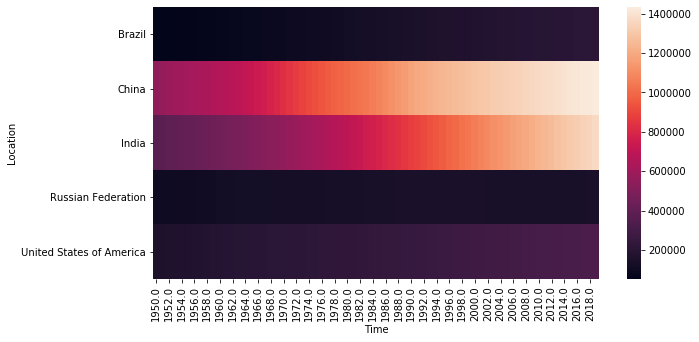

In [103]:
ax = sns.heatmap(df)

Вывод: численность населения Китая и Индии превышает численность населения РФ, США и Бразилии. Численность населения Китая и Индии значительно выросла в течение указанного временного периода.

5. Цель: посмотреть взамосязь численности населения для указанных стран в указанный период времени

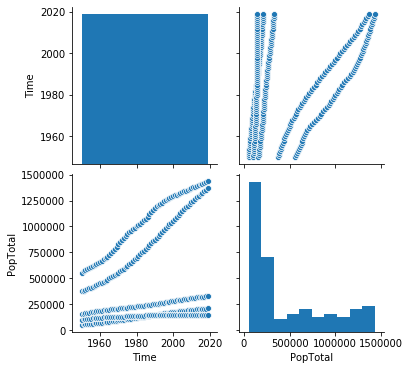

In [111]:
sns_plot = sns.pairplot(
    wp[['Time', 'PopTotal', 'Location']])
sns_plot